<h1>Рукописные цифры</h1>

In [86]:
from sklearn.datasets import load_digits, load_wine, load_breast_cancer
digits = load_digits()

In [87]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [88]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [89]:
print("Размерность данных:", digits.data.shape)
print("Количество классов:", len(digits.target_names))

Размерность данных: (1797, 64)
Количество классов: 10


In [90]:
from sklearn.model_selection import train_test_split

X_digits = digits.data
y_digits = digits.target

X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(
    X_digits, y_digits, test_size=0.2, random_state=42
)

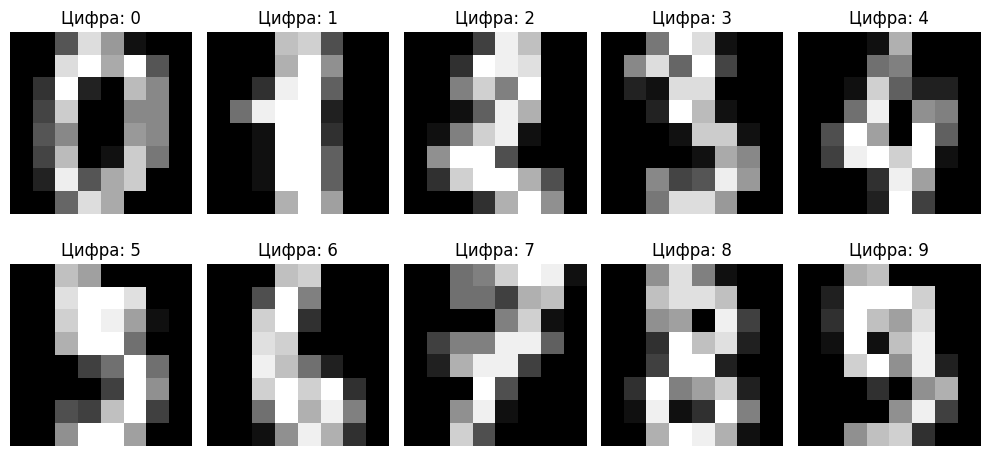

In [91]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Цифра: {digits.target[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [92]:
from sklearn.neighbors import KNeighborsClassifier

knn_digits = KNeighborsClassifier(n_neighbors=5)
knn_digits.fit(X_digits_train, y_digits_train)

KNeighborsClassifier()

In [93]:
y_digits_pred = knn_digits.predict(X_digits_test)

In [94]:
y_digits_pred = knn_digits.predict(X_digits_test)

In [95]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_digits = accuracy_score(y_digits_test, y_digits_pred)
print(f'Точность модели на данных цифр: {accuracy_digits:.2f}')

print('Отчет о классификации для данных цифр:')
print(classification_report(y_digits_test, y_digits_pred))

print('Матрица ошибок для данных цифр:')
print(confusion_matrix(y_digits_test, y_digits_pred))

Точность модели на данных цифр: 0.99
Отчет о классификации для данных цифр:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Матрица ошибок для данных цифр:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 

<h1>Вина</h1>

In [96]:
wine = load_wine()
print(wine.keys())
print(wine.DESCR)
print("Размерность данных:", wine.data.shape)
print("Количество классов:", len(wine.target_names))

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:          

In [97]:
X_wine = wine.data
y_wine = wine.target

X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42
)

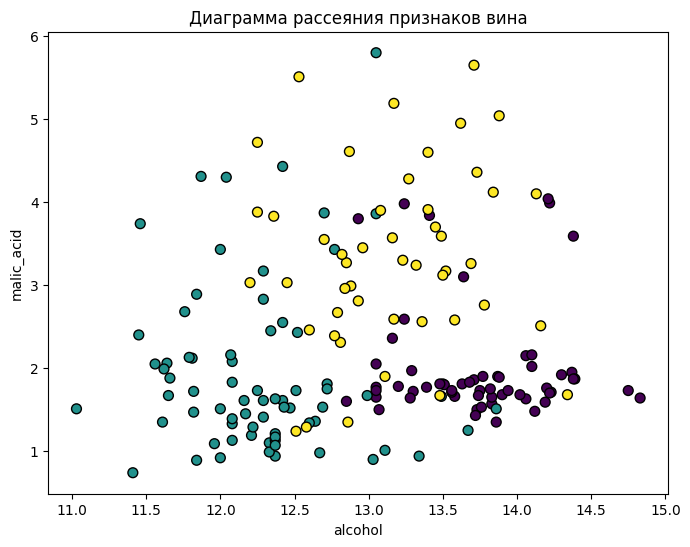

In [98]:
plt.figure(figsize=(8,6))
plt.scatter(X_wine[:,0], X_wine[:,1], c=y_wine, cmap='viridis', edgecolor='k', s=50)
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.title('Диаграмма рассеяния признаков вина')
plt.show()

In [99]:
knn_wine = KNeighborsClassifier(n_neighbors=5)
knn_wine.fit(X_wine_train, y_wine_train)

KNeighborsClassifier()

In [100]:
y_wine_pred = knn_wine.predict(X_wine_test)

In [101]:
accuracy_wine = accuracy_score(y_wine_test, y_wine_pred)
print(f'Точность модели на данных вина: {accuracy_wine:.2f}')

print('Отчет о классификации для данных вина:')
print(classification_report(y_wine_test, y_wine_pred))

print('Матрица ошибок для данных вина:')
print(confusion_matrix(y_wine_test, y_wine_pred))

Точность модели на данных вина: 0.72
Отчет о классификации для данных вина:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36

Матрица ошибок для данных вина:
[[12  0  2]
 [ 0 11  3]
 [ 2  3  3]]


<h1>Анализ датасета по раку груди</h1>

In [102]:
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.DESCR)
print("Размерность данных:", cancer.data.shape)
print("Количество классов:", len(cancer.target_names))

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 f

In [103]:
X_cancer = cancer.data
y_cancer = cancer.target

X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42
)

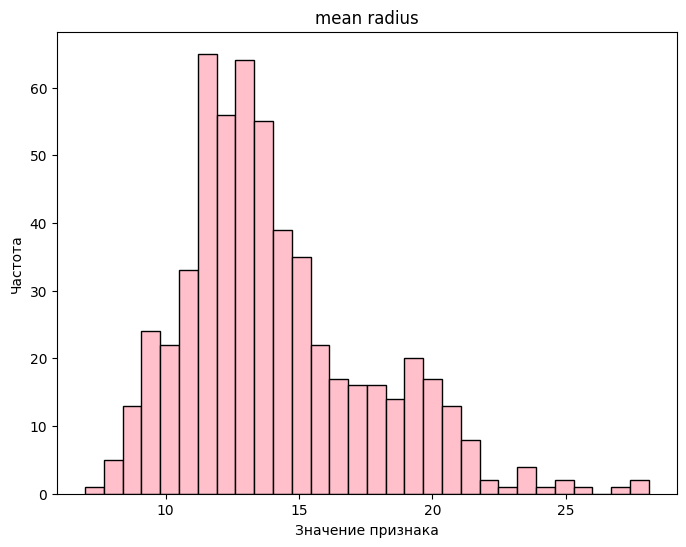

In [104]:
plt.figure(figsize=(8,6))
plt.hist(X_cancer[:,0], bins=30, color='pink', edgecolor='black')
plt.title(cancer.feature_names[0])
plt.xlabel('Значение признака')
plt.ylabel('Частота')
plt.show()

In [105]:
knn_cancer = KNeighborsClassifier(n_neighbors=5)
knn_cancer.fit(X_cancer_train, y_cancer_train)

KNeighborsClassifier()

In [106]:
y_cancer_pred = knn_cancer.predict(X_cancer_test)

In [107]:
accuracy_cancer = accuracy_score(y_cancer_test, y_cancer_pred)
print(f'Точность модели на данных рака груди: {accuracy_cancer:.2f}')

print('Отчет о классификации для данных рака груди:')
print(classification_report(y_cancer_test, y_cancer_pred))

print('Матрица ошибок для данных рака груди:')
print(confusion_matrix(y_cancer_test, y_cancer_pred))

Точность модели на данных рака груди: 0.96
Отчет о классификации для данных рака груди:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Матрица ошибок для данных рака груди:
[[38  5]
 [ 0 71]]
